In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10

import tensorflow as tf
import tensorflow_hub as hub

# DATA PREPARATION

In [2]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

X_train, X_test = X_train/255, X_test/255

In [3]:
class_order = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# Create a list to store the ordered training items
ordered_train_images = []
ordered_train_labels = []

# Iterate over the class order and extract the corresponding training items
for i in range(len(class_order)):
    class_name = class_order[i]
    class_index = i
    class_indices = np.where(y_train == class_index)[0]
    class_images = X_train[class_indices]
    class_labels = y_train[class_indices]
    ordered_train_images.extend(class_images)
    ordered_train_labels.extend(class_labels)
# Convert the ordered training items back to numpy arrays
X_train = np.array(ordered_train_images)
y_train = np.array(ordered_train_labels)

In [4]:
X_train = np.concatenate([X_train[:1000], X_train[5000:6000],
                          X_train[10000:11000], X_train[15000:16000],
                          X_train[20000:21000], X_train[25000:26000],
                          X_train[30000:31000], X_train[35000:36000],
                          X_train[40000:41000], X_train[45000:46000]])
y_train = np.concatenate([y_train[:1000], y_train[5000:6000],
                          y_train[10000:11000], y_train[15000:16000],
                          y_train[20000:21000], y_train[25000:26000],
                          y_train[30000:31000], y_train[35000:36000],
                          y_train[40000:41000], y_train[45000:46000]])

# step2

In [5]:
model = hub.load('https://tfhub.dev/google/magenta/arbitrary-image-stylization-v1-256/2')

In [6]:
def load_image(img_path):
    img = tf.io.read_file(img_path)
    img = tf.image.decode_image(img, channels=3)
    img = tf.image.convert_image_dtype(img, tf.float32)
    img = img[tf.newaxis, :]
    return img

style = load_image("frida.jpg")

UnicodeDecodeError: 'utf-8' codec can't decode byte 0xfd in position 169: invalid start byte

In [9]:
a = []

for i in range(100):
    content = tf.image.convert_image_dtype(X_train[i], tf.float32)
    content = content[tf.newaxis, :]
    stylized_image = model(tf.constant(content), tf.constant(style))[0]
    a.append(stylized_image)

In [12]:
a[0].shape

TensorShape([1, 32, 32, 3])

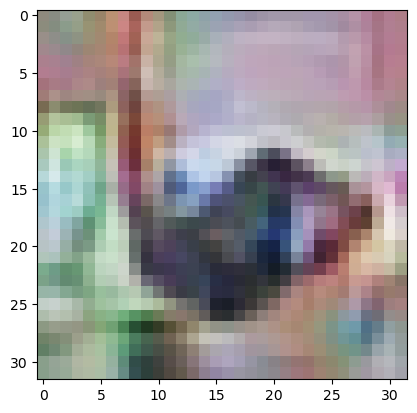

In [16]:
plt.imshow(np.squeeze(a[88]))
plt.show()